# CITS4403 - P2P Modelling

This notebook demonstrates a complex P2P model using agent gossip protocols (GNUTELLA-like) and graph-theory.

## Steps to Run
1. Run the first Cell and generate a Graph to use for the current runtime.
2. Run the Initiate Cell to propogate file-pieces.
3. Run the Simulate Cell to decide on the type of Simulation, Scenario and other Agent factors.

In [1]:
import sys, os, pathlib
project_root = pathlib.Path.cwd().parent
sys.path.insert(0, str(project_root))
from src.graph import nxgraph
import src.agent as agent
from utils.plotter import draw_graph, draw_gossip_step_by_step, start_new_run, create_round_gif
#from utils.simulator_old import get_network_stats, reset_simulation
from utils.simulator_new import simulate_round_agent_driven, get_network_stats, reset_simulation
from widgets.graph_widget import display_graph_widgets, get_graph, is_graph_generated
from widgets.init_widget import display_init_widgets, set_graph_data
from widgets.scenario_widget import display_scenario_widgets
from widgets.simulation_widget import display_simulation_widgets

import ipywidgets as widgets
from IPython.display import display, clear_output

display_graph_widgets()

Use the controls above to configure and generate your graph.
Once you click 'Generate Graph', you can proceed to the next cell.
The graph will be available for use in subsequent cells.


Generating BA Graph
Generating BA Graph
Generating BA Graph
Generating BA Graph
BA_graph


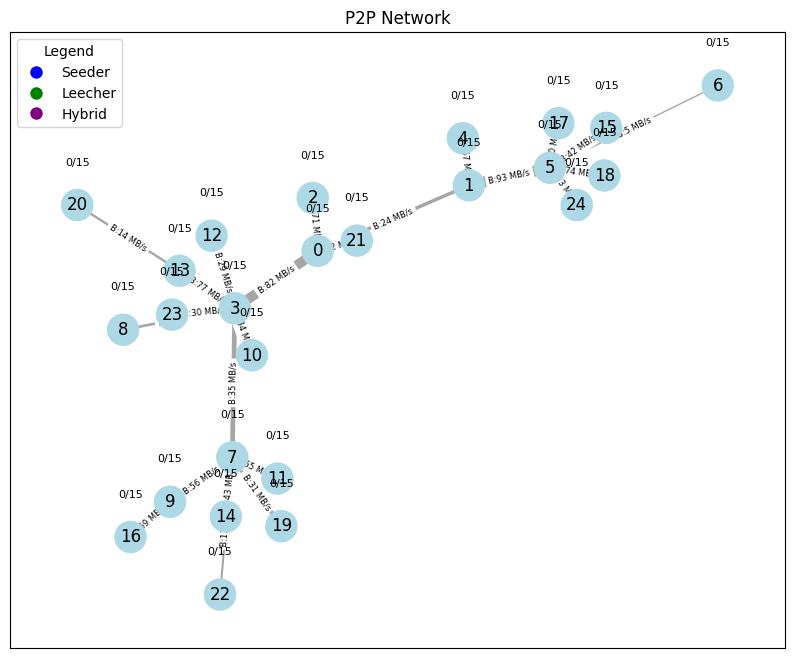

Average cluster coefficient is: 0.0
Average path length is: 3.51
BA_graph


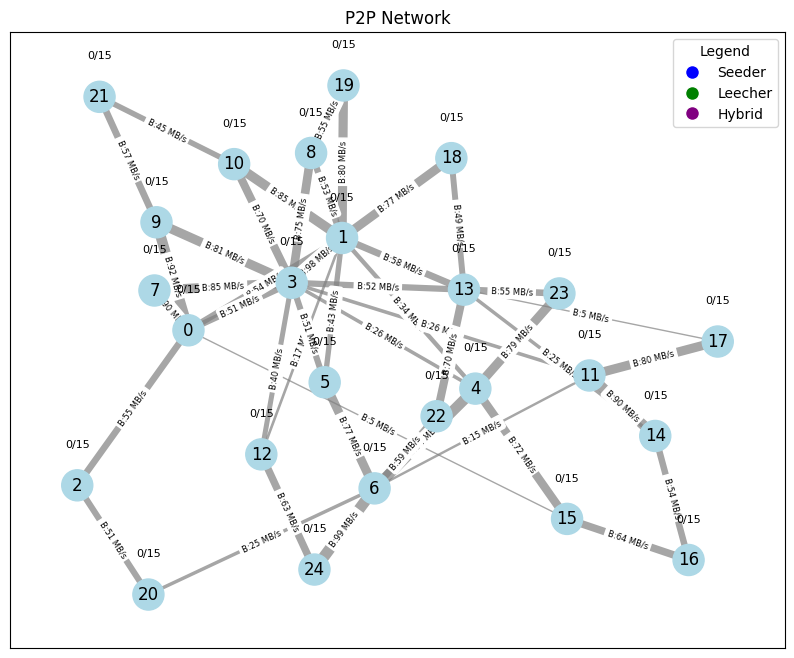

Average cluster coefficient is: 0.23
Average path length is: 2.37
BA_graph


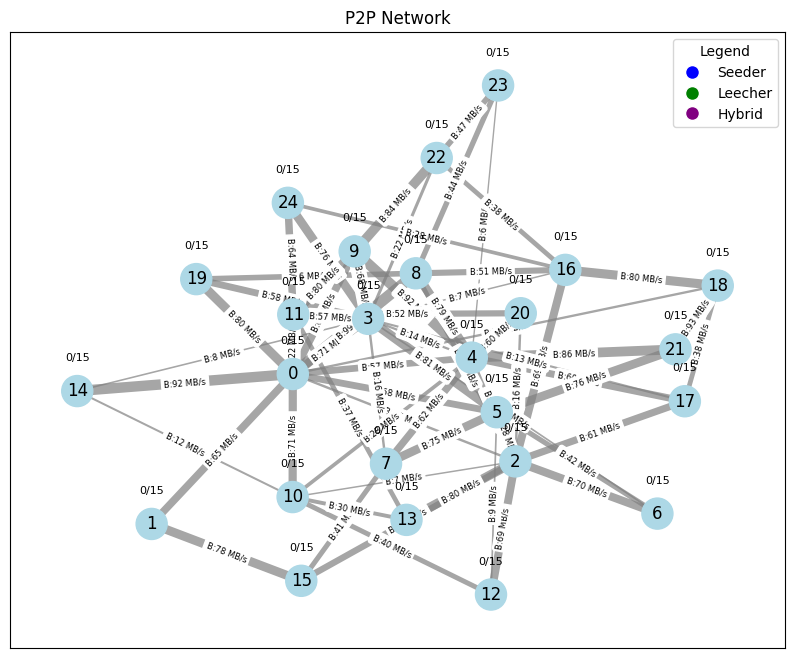

Average cluster coefficient is: 0.33
Average path length is: 1.95
BA_graph


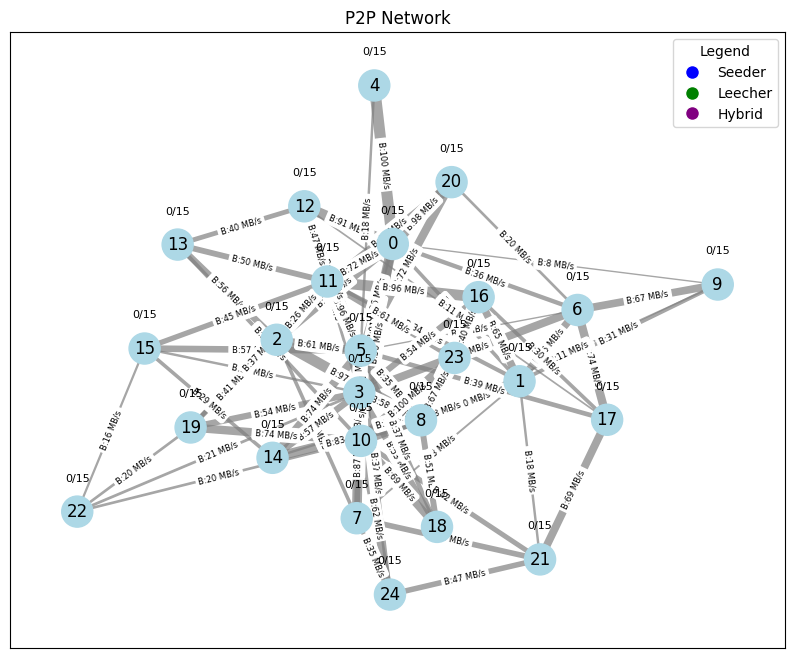

Average cluster coefficient is: 0.45
Average path length is: 1.79


TypeError: nxgraph.ER_Graph_nm() missing 1 required positional argument: 'seed'

In [ ]:
# Generation of graphs via code
from src.graph import nxgraph
from utils.plotter import draw_graph
from src.analytics import clustering_co
from src.analytics import path_length

# generate BA graph
node = 25
seed = 69
lower_ut = 50
upper_ut = 50
FILE_PIECES = 15
G = nxgraph()

graph_store_ba = []
avg_co_ba = []
avg_pl_ba = []
avg_deg_ba = []
avg_co_er = []
avg_pl_er = []
for e in range(1,5,1):
    ba = G.BA_graph(
                    nodes=node, 
                    edges=e, 
                    seed=seed, 
                    weighted=True, 
                    lower_ut=lower_ut, 
                    upper_ut=upper_ut)
    graph_store_ba.append(ba)

    
for g in graph_store_ba:
    print('BA_graph')
    draw_graph(g,edge_labels=None,total_pieces=FILE_PIECES)
    cluster = round(clustering_co(g),2)
    path_L = round(path_length(g),2)
    avg_deg = sum(dict(g.degree()).values()) / g.number_of_nodes()
    avg_deg_ba.append(avg_deg)
    avg_co_ba.append(cluster)
    avg_pl_ba.append(path_L)
    print('Average cluster coefficient is: %s' % cluster)
    print('Average path length is: %s' % path_L)

# generate ER graph based on average deg of BA graph
graph_store_er = []
for avdeg in avg_deg_ba:
    edge = int(node*avdeg/2)
    er = G.ER_Graph_nm(
                    nodes=node, 
                    edges=edge, 
                    weighted=True, 
                    seed=69
                    lower_ut=lower_ut, 
                    upper_ut=upper_ut)
    graph_store_er.append(er)

for g in graph_store_er:
    print('ER_graph')
    draw_graph(g,edge_labels=None,total_pieces=FILE_PIECES)
    cluster = round(clustering_co(g),2)
    path_L = round(path_length(g),2)
    avg_co_er.append(cluster)
    avg_pl_er.append(path_L)
    print('Average cluster coefficient is: %s' % cluster)
    print('Average path length is: %s' % path_L)




In [9]:
########################################################
# MAIN CONTROLLER
########################################################
if not is_graph_generated(): raise RuntimeError("Graph must be generated before proceeding. Run the first cell and click 'Generate Graph' to create a network.")
G, FILE_PIECES = get_graph()
set_graph_data(G.graph, FILE_PIECES)

print(f"Using graph with {G.graph.number_of_nodes()} nodes and {G.graph.number_of_edges()} edges")

# Display initialization widgets
display_init_widgets()
display_scenario_widgets()
display_simulation_widgets()


RuntimeError: Graph must be generated before proceeding. Run the first cell and click 'Generate Graph' to create a network.

In [ ]:
# Launching controller via a hybrid code & UI
# select which generated graph to use in either graph_store_ba, or graph_store_er
chosen_graph = graph_store_ba[0]
set_graph_data(chosen_graph, FILE_PIECES)
'''
for g in graph_store_ba:
    set_graph_data(g, FILE_PIECES)

    # simulation initialisation
    n_seeders = 1
    sim_seed = 69 
    agent.assign_n_seeders(G, n=n_seeders, seed=sim_seed)
    agent.initialize_file_sharing(G, FILE_PIECES, seed=sim_seed, 
                                               distribution_type='n_seeders', n_seeders=n_seeders)
    # scenario config

    # simulation control
'''
print(f"Using graph with {G.graph.number_of_nodes()} nodes and {G.graph.number_of_edges()} edges")

# Display initialization widgets
display_init_widgets()
display_scenario_widgets()
display_simulation_widgets()

Using graph with 25 nodes and 280 edges


Use the controls above to reset the simulation and apply file distributions.
Make sure to generate a graph first using the graph generation widgets.


## PLACEHOLDER ##.


Generate a graph and initialize file sharing first.


In [ ]:
print(f"\nFinal graph visualization:")
gifs = create_round_gif(duration=300)
draw_graph(G.graph, total_pieces=FILE_PIECES)